<a href="https://colab.research.google.com/github/KeonhoChu/Train/blob/main/VGG_16_net_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cifar 10 with vgg16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from keras.models import Model
from keras.layers import Flatten,Dense,Input,Conv2D,MaxPooling2D,Dropout, BatchNormalization
from keras import optimizers
from tensorflow.keras.regularizers import l2
#from tensorflow.keras import reularizers


cifar10 = datasets.cifar10
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']

#Valid/test dataset 나누기
valid_images=[]
valid_labels=[]

for i in range(5000):
    valid_images.append(test_images[i])
    valid_labels.append(test_labels[i])
test_images_5000 = []
test_labels_5000 = []
for i in range(5000):
    test_images_5000.append(test_images[5000+i])
    test_labels_5000.append(test_labels[5000+i])

test_images_5000 = np.array(test_images_5000)
test_labels_5000 = np.array(test_labels_5000)
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)
print('Train samples:', train_images.shape,train_labels.shape)
print('valid samples:', valid_images.shape,valid_labels.shape)
print('Test samples:', test_images_5000.shape,test_labels_5000.shape)

170498071/170498071 [==============================] - 4s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
valid samples: (5000, 32, 32, 3) (5000, 1)
Test samples: (5000, 32, 32, 3) (5000, 1)


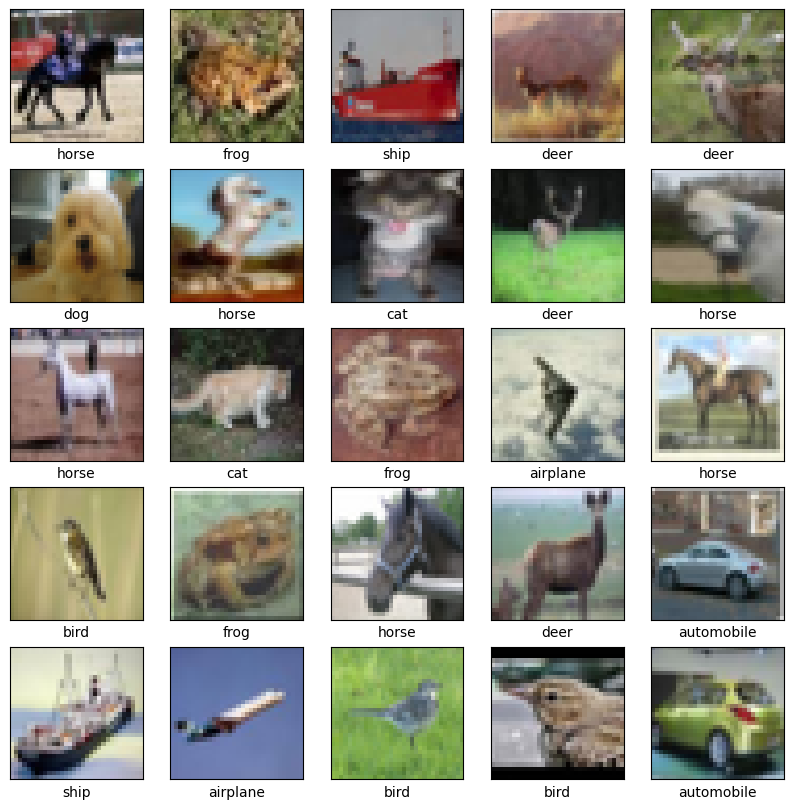

In [ ]:

#test data가 잘 할당되었나 확인해보기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_5000[i])
    plt.xlabel(class_names[test_labels_5000[i][0]])
plt.show()

In [ ]:

#기존 VGG16에서 parameter 갯수를 줄이고, dense layer 노드 갯수를 줄임.
from keras.layers import BatchNormalization
def VGG16_Brief(classes=10): # classes = 감지할 클래스 수
    img_rows, img_cols = 32, 32
    img_channels = 3
    img_dim = (img_rows, img_cols, img_channels) #차원..shape 정의..

    img_input = Input(shape=img_dim) #튜플.. 변경 x
    x = Conv2D(32,(3,3),padding='same',activation = 'relu')(img_input) #1층
    x = Dropout(0.256)(x)
    # x = Conv2D(32,(3,3),padding='same',activation = 'relu')(x) #2층
    # x = Dropout(0.15)(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x) #2층 maxpool


    x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) #3층
    x = Dropout(0.25)(x)
    # x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) #4층
    # x = Dropout(0.15)(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x) #4층 maxpool
    # x = Dropout(0.25)(x)

    x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) #5층
    x = Dropout(0.25)(x)
    # x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #6층
    # x = Dropout(0.15)(x)
    # x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #7층
    # x = Dropout(0.15)(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x) #7층 maxpool
    # x = Dropout(0.2)(x)

    # x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #8층
    # x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #9층
    # x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #10층
    # x = MaxPooling2D((2,2),strides=(2,2))(x) #10층 maxpool

    # x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #11층
    # x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #12층
    # x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #13층
    # x = MaxPooling2D((2,2),strides=(2,2))(x) #13층 maxpool

    x = Flatten()(x)
    # x = Dense(1024, activation = 'relu')(x) #14층
    # x = Dropout(0.5)(x)
    x = Dense(512, activation = 'relu')(x) #15층
    x = Dropout(0.5)(x)
    x = Dense(classes, activation = 'softmax')(x)

    model = Model(inputs=img_input, outputs = x)
    return model

model = VGG16_Brief(classes = 10)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                             

In [ ]:

model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr = 0.00001)
hist = model.fit(train_images,train_labels,epochs=100,
                 validation_data=(valid_images,valid_labels),
                 callbacks = [learning_rate_reduction],batch_size=256)

Epoch 1/100
196/196 [==============================] - 17s 17ms/step - loss: 4.7699 - accuracy: 0.2869 - val_loss: 1.7405 - val_accuracy: 0.4366 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 3s 15ms/step - loss: 1.5835 - accuracy: 0.4271 - val_loss: 1.5160 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 3s 16ms/step - loss: 1.4433 - accuracy: 0.4786 - val_loss: 1.3943 - val_accuracy: 0.5576 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 3s 15ms/step - loss: 1.3415 - accuracy: 0.5205 - val_loss: 1.3204 - val_accuracy: 0.5776 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 3s 14ms/step - loss: 1.2552 - accuracy: 0.5548 - val_loss: 1.2345 - val_accuracy: 0.6264 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 3s 15ms/step - loss: 1.1919 - accuracy: 0.5797 - val_loss: 1.1720 - val_accuracy: 0.6280 - lr: 0.0010
Epoch 7/100
196/196 [==============================] - 3s

In [ ]:

test_loss, test_acc = model.evaluate(test_images_5000,test_labels_5000)
print('test loss:', test_loss)
print('test acc:', test_acc)

157/157 [==============================] - 1s 3ms/step - loss: 0.6329 - accuracy: 0.7880
test loss: 0.6328785419464111
test acc: 0.7879999876022339


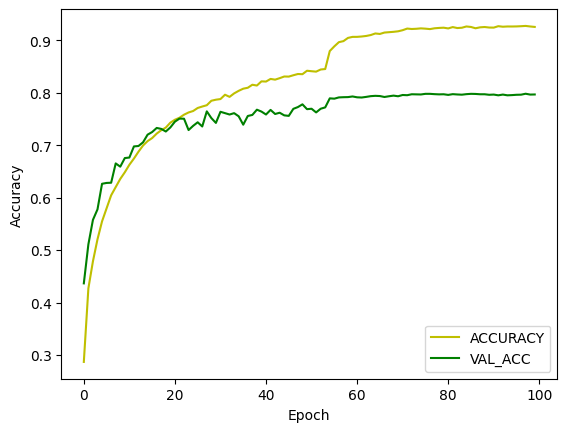

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"], 'y', label= 'ACCURACY')
plt.plot(hist.history["val_accuracy"], 'g', label= 'VAL_ACC')

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()

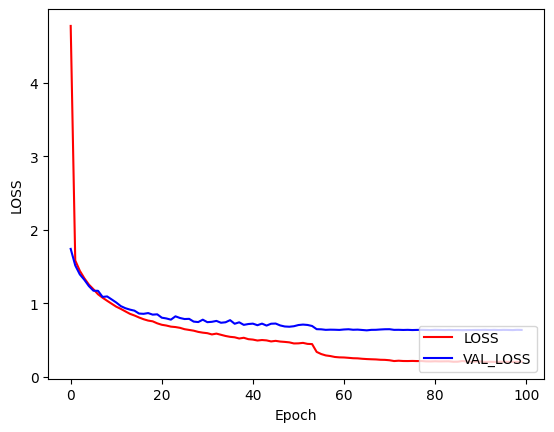

In [ ]:

plt.subplot(111)
plt.plot(hist.history['loss'], 'r', label= 'LOSS')
plt.plot(hist.history["val_loss"], 'b', label= 'VAL_LOSS')
#plt.plot(test_acc, 'r', label= 'TEST_ACC')
plt.ylabel("LOSS")
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()